In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
L7 = pd.read_csv('L7MODEL/resonant.dat',skiprows=28,sep='\s+',header=0)
data_32 = L7[L7['n1']/L7['n2']==3/2]
data_21 = L7[L7['n1']/L7['n2']==2/1]
data_32

,a,e,i,node,peri,M,H,_,type,n1,n2
6678,39.506,0.132,28.043,263.646,39.619,192.462,7.95,44.62,resonant,3,2
6679,39.562,0.207,1.478,142.563,296.662,357.721,8.14,31.38,resonant,3,2
6680,39.413,0.270,13.306,153.696,145.606,327.088,8.48,31.70,resonant,3,2
6681,39.492,0.228,19.632,332.407,316.258,304.681,8.13,36.03,resonant,3,2
6682,39.450,0.201,27.106,164.523,358.567,61.503,7.06,37.06,resonant,3,2
...,...,...,...,...,...,...,...,...,...,...,...
10013,39.441,0.288,23.916,338.425,356.402,36.932,8.28,32.06,resonant,3,2
10014,39.430,0.141,9.473,234.033,183.496,215.532,7.44,44.17,resonant,3,2
10015,39.521,0.167,15.142,2.098,25.903,156.597,8.18,45.71,resonant,3,2
10016,39.629,0.187,23.016,134.511,325.222,71.804,7.70,38.65,resonant,3,2


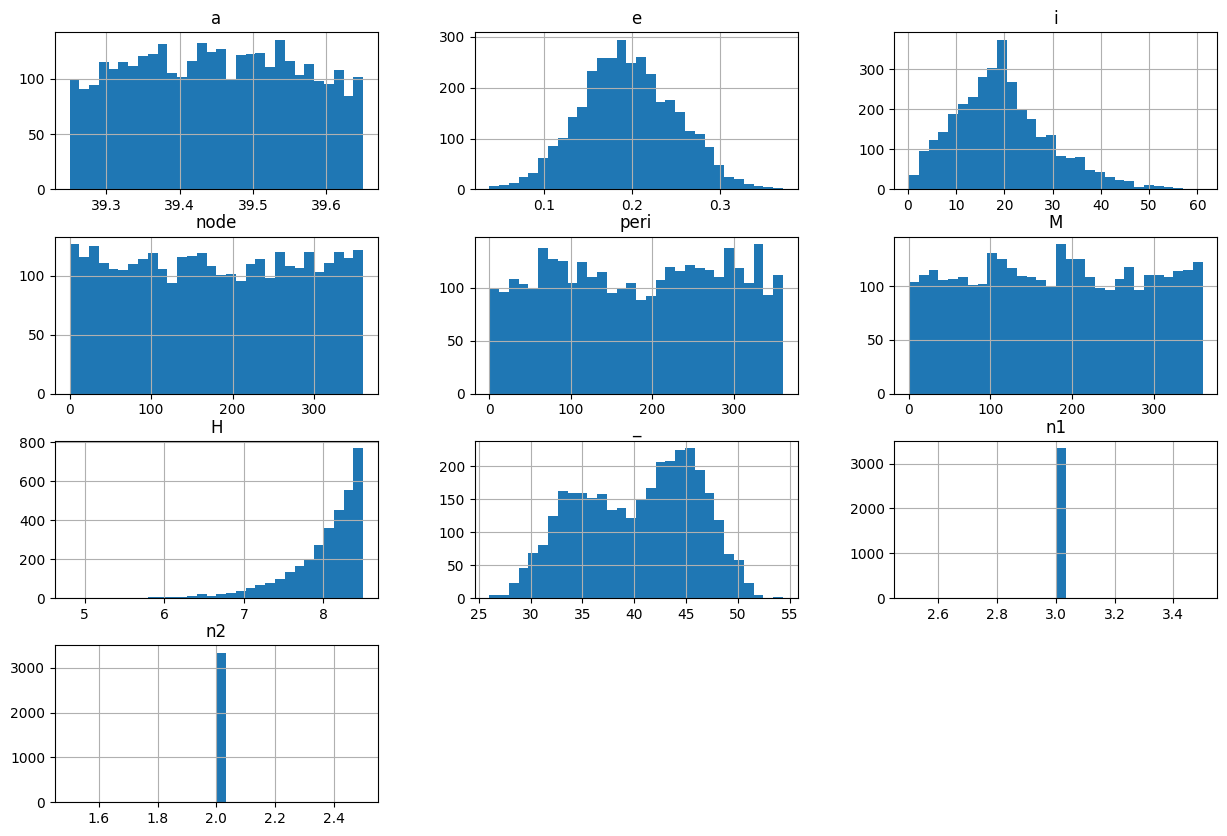

In [88]:
data_32.hist(bins=30, figsize=(15, 10));

In [92]:
def generate_parameters(data,index):
    a,e,i,node,peri,M,H,_,orbit_type,n1,n2 = list(list(data.iterrows())[index][1])
    new_params = {
        'a': a + np.random.uniform(-1e-3,1e-3),
        'e': e + np.random.uniform(-1e-3,1e-3),
        'i': i + np.random.uniform(-1,1),
        'node': (node + np.random.uniform(-180,180))%360,
        'peri': (peri + np.random.uniform(-180,180))%360,
        'M': (M + np.random.uniform(-180,180))%360,
        'H': H,
        '_': _,
        'type': orbit_type,
        'n1': n1,
        'n2': n2
    }
    return new_params
    

In [104]:
data_32_new = data_32
for i in range(len(data_32)):
    for j in range(2):
       data_32_new = data_32_new.append(generate_parameters(data_32,i),ignore_index=True)

/var/folders/hq/n7szfvv10c17mpj1vk2tg_hw0000gn/T/ipykernel_57485/2241333346.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_32_new = data_32_new.append(generate_parameters(data_32,i),ignore_index=True)
/var/folders/hq/n7szfvv10c17mpj1vk2tg_hw0000gn/T/ipykernel_57485/2241333346.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_32_new = data_32_new.append(generate_parameters(data_32,i),ignore_index=True)
/var/folders/hq/n7szfvv10c17mpj1vk2tg_hw0000gn/T/ipykernel_57485/2241333346.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_32_new = data_32_new.append(generate_parameters(data_32,i),ignore_index=True)
/var/folders/hq/n7szfvv10c17mpj1vk2tg_hw0000gn/T/ipykernel_57485/2241333346.py:4: FutureWarning: The

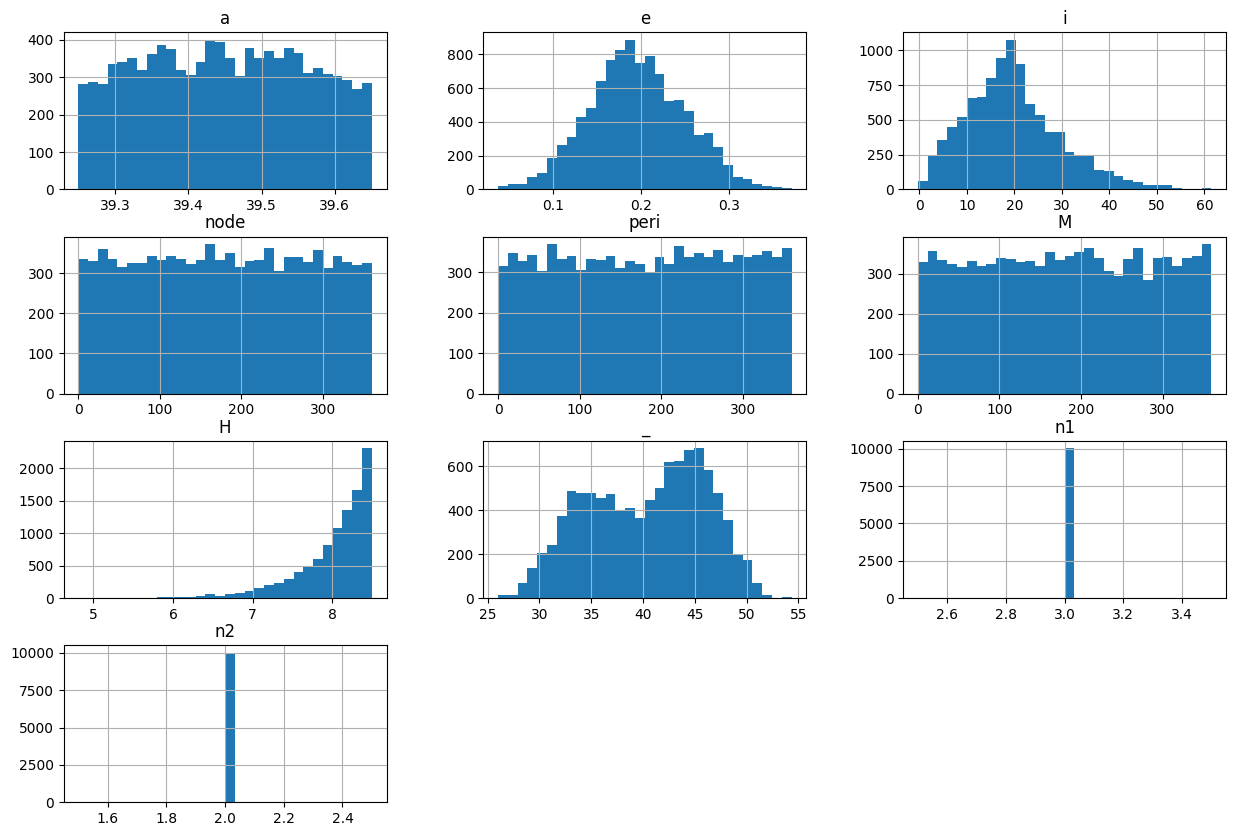

In [105]:
data_32_new.hist(bins=30, figsize=(15, 10));

In [106]:
data_32_new.to_csv('modified_L7_32.csv',index=False)

In [107]:
pd.read_csv('modified_L7_32.csv')

,a,e,i,node,peri,M,H,_,type,n1,n2
0,39.506000,0.132000,28.043000,263.646000,39.619000,192.462000,7.95,44.62,resonant,3,2
1,39.562000,0.207000,1.478000,142.563000,296.662000,357.721000,8.14,31.38,resonant,3,2
2,39.413000,0.270000,13.306000,153.696000,145.606000,327.088000,8.48,31.70,resonant,3,2
3,39.492000,0.228000,19.632000,332.407000,316.258000,304.681000,8.13,36.03,resonant,3,2
4,39.450000,0.201000,27.106000,164.523000,358.567000,61.503000,7.06,37.06,resonant,3,2
...,...,...,...,...,...,...,...,...,...,...,...
10015,39.521394,0.166101,15.348346,91.203579,352.725688,45.783256,8.18,45.71,resonant,3,2
10016,39.628986,0.186526,22.873001,164.597756,115.914367,126.059581,7.70,38.65,resonant,3,2
10017,39.628039,0.186753,23.987031,44.345866,267.593661,150.667066,7.70,38.65,resonant,3,2
10018,39.515275,0.161148,11.384854,186.623315,26.898816,175.351020,8.21,45.76,resonant,3,2
